# ITMAL Exercise L09 Keras-mlp-moon 

### Qa Using a Keras MLP on the Moon-data

Run the three cells below, and inspect the plots. I get an accuracy of 0.96 using the setup below.

Now, change the optimizer from `Adam` to our well-known `SDG` method, using

> `optimizer = SGD(lr=0.1)`

instead of `ADAM(lr=0.1)`.

Does it still produce a good score, in form of the `categorical_accuracy`? My accuracy now drops to 0.88, and the new decision boundary looks like a straight line!

Find a way to make the `SDG` produce a result similar to the `ADAM` optimizer: Maybe you need to crack up the number of `EPOCHS` during training to get a better result using the `SGD` optimizer? 

In [14]:
# TODO: Qa..run Keras on Moon, cell 1

from libitmal import kernelfuns as itmalkernelfuns
itmalkernelfuns.EnableGPU()                              
#itmalkernelfuns.DisableGPU()   

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn import datasets

import numpy as np
from time import time

np.random.seed(42)

# Build Keras model 
model = Sequential()
model.add(Dense(input_dim=2, units=8, activation="tanh", kernel_initializer="normal"))
model.add(Dense(units=4, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

optimizer = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
#optimizer = Adam(lr=0.1)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

# Make data
X, y = datasets.make_moons(2000, noise=0.20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)

assert y.ndim==1
assert y_train_binary.ndim==2
assert y_test_binary.ndim ==2

# Train
VERBOSE     = 0
EPOCHS      = 1000 #using SGD requires a lot more epocs to make a correct decision boundary

start = time()
history = model.fit(X_train, y_train_binary, validation_data=(X_test, y_test_binary), epochs=EPOCHS, verbose=VERBOSE)
t = time()-start

print(f"OK, training time={t:0.1f}")

OK, training time=55.6


Training time: 51.5 sec
Test loss:     0.27692357460657757
Test accuracy: 0.8866666674613952
All scores in history: [0.27692357460657757, 0.8866666674613952, 0.08646331777175267, 0.17169797261555989]


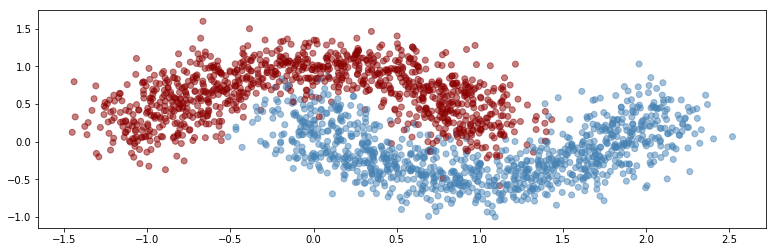

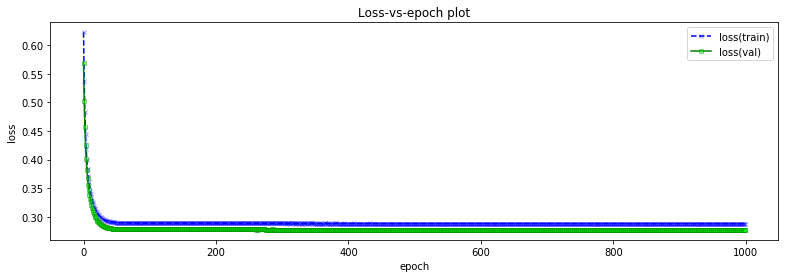

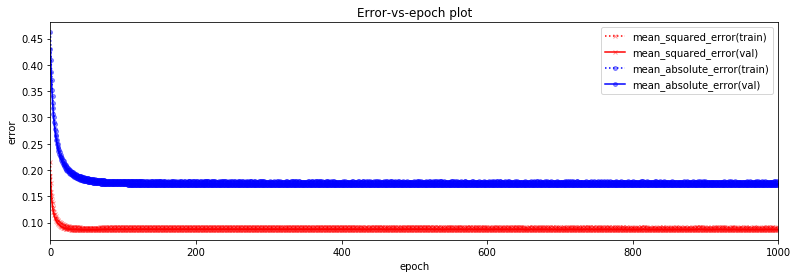

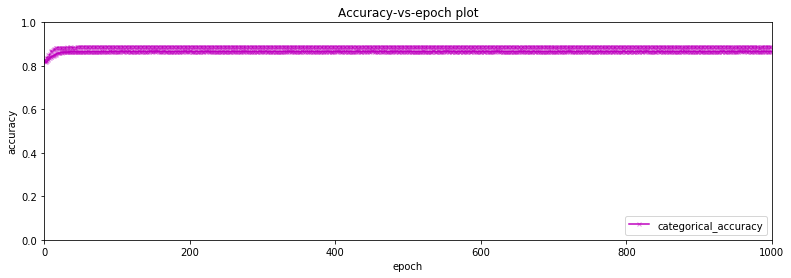

In [12]:
# TODO: Qa..run Keras on Moon, cell 2

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#print(history.history)
score = model.evaluate(X_test, y_test_binary, verbose=0)

print(f"Training time: {t:0.1f} sec")
print(f"Test loss:     {score[0]}") # loss is score 0 by definition?
print(f"Test accuracy: {score[1]}")
print(f"All scores in history: {score}")

N=4
FX=60
FY=4
A=0.4
S=4

# Plot org data
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 1)
colors = ['steelblue' if label == 1 else 'darkred' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors, alpha=.5)
plt.show()

# Plot loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 2)
plt.plot(history.history["loss"]    , "b--x", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_loss"], "g-s" , markerfacecolor=(0, 1, 0, A), markersize=S)
plt.legend(loc="best", labels=("loss(train)","loss(val)"))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss-vs-epoch plot")
plt.show()

# Plot all metrics + loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 3)
plt.plot(history.history["mean_squared_error"],      "r:x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["val_mean_squared_error"],  "r-x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["mean_absolute_error"],     "b:o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_mean_absolute_error"], "b-o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.xlabel("epoch")
plt.ylabel("error")
plt.xlim((0, EPOCHS))
plt.legend(loc="best", labels=("mean_squared_error(train)",  "mean_squared_error(val)", 
                               "mean_absolute_error(train)", "mean_absolute_error(val)", 
                               "loss(categorical_crossentropy,train)", "loss(categorical_crossentropy,val)"))
plt.title("Error-vs-epoch plot")
plt.show()

# Plot accuracy
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 4)
plt.plot(history.history["categorical_accuracy"],     "m-x", markerfacecolor=(1, 0, 1, A), markersize=S)
plt.plot(history.history["val_categorical_accuracy"], "m:x", markerfacecolor=(1, 0, 1, A), markersize=S)
ax.set_ylim([0,1])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xlim((0, EPOCHS))
plt.legend(loc="lower right", labels=("categorical_accuracy",))
plt.title("Accuracy-vs-epoch plot")
plt.show()

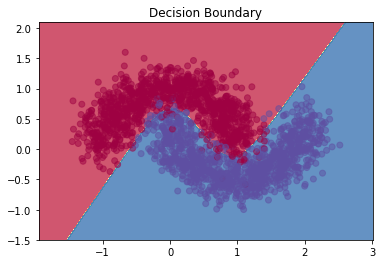

In [16]:
# TODO: Qa..run Keras on Moon, cell 3

# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral,alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, alpha=.5)

# Predict and plot decision boundary
plot_decision_boundary(lambda x: model.predict_classes(x, batch_size=200))
plt.title("Decision Boundary")
plt.show()

### Qb  Keras and Classification Categories

It is customary practice to convert both binary and multiclass classification labels to a one-hot encoding. 

Explain one-hot encoding and the 

```python
y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)
```
and the used categorical metric (compare it to our well know accuracy function),

```python
metrics=['categorical_accuracy',..
```

NOTE: Keras'  `categorical_accuracy` is implemented as
```
def categorical_accuracy(y_true, y_pred):
    return K.cast(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)), K.floatx())

```
but also used internal TensorFlow tensors instead of `numpy.arrays` and these are right now difficult to work with directly.

## TODO: Qb..explain in text or create your own categorical_accuracy fun..

#### One-hot encoding
As seen in the picture below one hot encoding transforms tables into a binary representation, which for one makes adding new items to the table a lot easier. Furthermore we avoid the problem with label categorazation which assumes the higher value the better, which in this case would mean that Honda has a higher value that VW.

<img src="Figs/one_hot_encoding.jpg" style="width:300px">
<small><em>
    <center>An example of one hot encoding.</center> 
</xsmall></center>
</em></small>

source: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f


## explain accuracy function
### to_categorical:
to_categorical converts a class vector (integers) to binary class matrix.
source: https://keras.io/utils/

### Categorical_accuracy:
Categorical accuracy is the way accuracy is measuured in keras. It calculates the mean accuracy rate across all predictions for multiclass classification problems. This is done by checking the index of the value of the true table and measuring it against the index of the predicted value. Source: https://faroit.com/keras-docs/1.2.0/metrics/#categorical_accuracy



### Qc Optimize the Keras Model

Now, try to optimize the model by 

* increasing/decreasing the number of epochs,
* adding more neurons per layer, 
* adding whole new layers,
* changing the activation functions in the layers,
* changing the output activation from `activation="softmax"` to something else,

Comment on your changes, and relate the resulting accuracy, accuracy-vs-epochs, loss-vs-epoch and decision boundary plots to your changes, ie. try to get a feeling of what happens when you modify the model hyperparameters. 

NOTE: Many times the model seems to get stuck on an extreme flat loss plateau, and the decision boundary displays just a 'dum' straight line through the moons!

OPTIONAL: should the moon data be standardized or normalized to say range [-1;1] in both $\mathbf x$-dimensions? Will it help, or is the data OK as-is?

OK, training time=4.7
Training time: 4.7 sec
Test loss:     0.11631274265547593
Test accuracy: 0.9616666666666667
All scores in history: [0.11631274265547593, 0.9616666666666667, 0.028435022063010063, 0.04250488045314948]


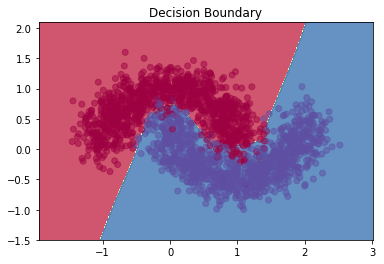

In [53]:
# TODO: Qc..

np.random.seed(42)

# Build Keras model 
model2 = Sequential()
model2.add(Dense(input_dim=2, units=16, activation="tanh", kernel_initializer="normal"))
model2.add(Dense(units=8, activation="relu"))
model2.add(Dense(units=4, activation="relu"))
model2.add(Dense(units=2, activation="softmax"))

#optimizer = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
optimizer = Adam(lr=0.1)
model2.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

# Make data
X, y = datasets.make_moons(2000, noise=0.20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)

assert y.ndim==1
assert y_train_binary.ndim==2
assert y_test_binary.ndim ==2

# Train
VERBOSE     = 0
EPOCHS      = 30 #1000

start = time()

history = model2.fit(X_train, y_train_binary, validation_data=(X_test, y_test_binary), epochs=EPOCHS, verbose=VERBOSE)
t = time()-start

print(f"OK, training time={t:0.1f}")

#print(history.history)
score2 = model2.evaluate(X_test, y_test_binary, verbose=0)

print(f"Training time: {t:0.1f} sec")
print(f"Test loss:     {score2[0]}") # loss is score 0 by definition?
print(f"Test accuracy: {score2[1]}")
print(f"All scores in history: {score2}")

# Predict and plot decision boundary
plot_decision_boundary(lambda x: model2.predict_classes(x, batch_size=200))
plt.title("Decision Boundary")
plt.show()


#### Results

In this exercise we've used the "adam" optimizers since it required less epoch which made the runtime a lot faster.

##### Increasing/decreasing the number of epocs
when increasing the number of ephocs we see a slight increase in accuracy and a slight decrease in loss. however when the number of epochs exceeds 40 (using "adam") the test goes bananas, and the decision boundary goes all over the place.

##### adding more neurons per layer
by adding more neurons per layer we actually see a decrease in accuracy and an increase in loss

##### adding whole new layers,
Adding layers on the contrary contributes to higher accuracy and smaller loss

##### changing the activation functions in the layers
Changing the activation functions of the layers also affects the results in various ways i.g changing the second layer from "relu" to "tanh" we saw a double in loss.

##### changing the output activation from `activation="softmax"` to something else
This makes the loss skyrocket, and renders the test unusable.